## Question 1
Develop a circle and line representation of a robot.Take user input of a position (x,y) and
orientation (theta) to place the robot in the plot.

Enter origin: 10 10
Enter orientation angle: 135


(0.0, 20.0)

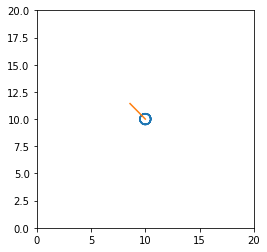

In [65]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation 
%matplotlib inline

fig, ax = plt.subplots()
ax.set_aspect("equal")

w = 10
r = 0.5

# Take user input for origin coordinates
inp = input("Enter origin: ")
x0,y0 = tuple(int(num) for num in inp.split())
axis = np.linspace(0,2)
circle = []

# Take user input for orinetation angle
theta = int(input("Enter orientation angle: "))
theta = 0.0174*theta # convert to radians
line = []
 
for i in range(0,len(axis)):
    k = axis[i]
    x = x0 + r*math.cos(w*k)
    y = y0 + r*math.sin(w*k)
    circle.append([x,y])
    
    xl = x0 + k*math.cos(theta)
    yl = y0 + k*math.sin(theta)
    line.append([xl,yl])

points_c = pd.DataFrame(circle)
points_l = pd.DataFrame(line)
plt.plot(points_c[0],points_c[1])
plt.plot(points_l[0],points_l[1])
plt.xlim(0,20)
plt.ylim(0,20)



### Question 1 (a)
Generate a parametric equation for a trajecctory (x vs t and y vs t, theta vs t, 0<=t<=1),
where the starting point is at the origin of the Global frame, and plot it. Also find the
linear and angular velocities by diffierntiating the parametric equations and plot.

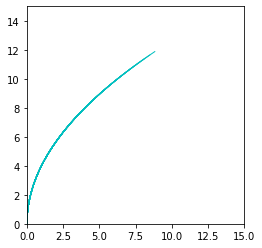

In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation 
%matplotlib inline

fig, ax = plt.subplots()

ax.set_aspect("equal")

plt.xlim(0,15)
plt.ylim(0,15)

t = np.linspace(0,1,100)

linear_vel = []
angular_vel = []

def curve():
    
    curve = []
    global a
    a = 4
    
    for i in range(0,len(axis)):
        k = t[i]
    
        xt = (a*k**2)*9
        yt = (2*a*k)*3
        curve.append([xt,yt])
        
        # On calculating the derivatives
        x_dot = 18*a*k
        y_dot = 6*a
        theta_dot = -3/(9*k**2 + 1)
        
        linear_vel.append([x_dot,y_dot])
        angular_vel.append(theta_dot)
        
        points_t = pd.DataFrame(curve)
        plt.plot(points_t[0], points_t[1], color='c', lw=1)

        
curve()
    

Linear velocities vx,vy: [[0.0, 24], [0.7272727272727273, 24], [1.4545454545454546, 24], [2.1818181818181817, 24], [2.909090909090909, 24], [3.6363636363636367, 24], [4.363636363636363, 24], [5.090909090909092, 24], [5.818181818181818, 24], [6.545454545454546, 24], [7.272727272727273, 24], [8.0, 24], [8.727272727272727, 24], [9.454545454545455, 24], [10.181818181818183, 24], [10.90909090909091, 24], [11.636363636363637, 24], [12.363636363636365, 24], [13.090909090909092, 24], [13.81818181818182, 24], [14.545454545454547, 24], [15.272727272727273, 24], [16.0, 24], [16.72727272727273, 24], [17.454545454545453, 24], [18.181818181818183, 24], [18.90909090909091, 24], [19.63636363636364, 24], [20.363636363636367, 24], [21.09090909090909, 24], [21.81818181818182, 24], [22.545454545454547, 24], [23.272727272727273, 24], [24.000000000000004, 24], [24.72727272727273, 24], [25.45454545454546, 24], [26.181818181818183, 24], [26.90909090909091, 24], [27.63636363636364, 24], [28.363636363636367, 24

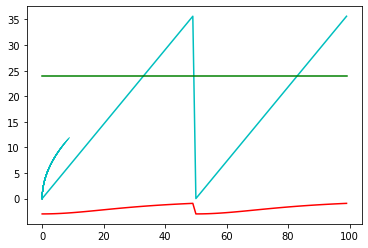

In [67]:
curve()

points_linear = pd.DataFrame(linear_vel)
points_angular = pd.DataFrame(angular_vel)
plt.plot(points_linear[0], color = 'c')
plt.plot(points_linear[1], color = 'g')
plt.plot(points_angular, color = 'r')

print("Linear velocities vx,vy: {}".format(linear_vel))
print("Angular velocity: {}".format(angular_vel))

### Question 1 (b)
Divide the path parametrically in many small segments, use a loop to plot the agent at
those posees generated by the parametric equations. (orientation of the robot can be
found from the slope of the trajectory).

/tmp/ipykernel_360723/3205500106.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  slope = np.poly1d([1/(3*k)])


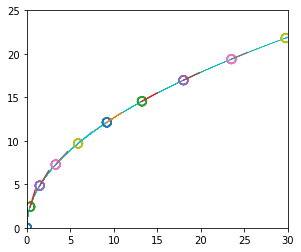

In [63]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

axis = np.linspace(0,2,100)

w = 10
r = 0.5

fig, ax = plt.subplots()

curve_list = []

theta = []

plt.xlim(0, 30)
plt.ylim(0, 25)

ax.set_aspect("equal")

t = np.linspace(0,1,100)

def curve():
    
    curve = []
    global a
    a = 4
    
    for i in range(0,len(axis)):
        k = t[i]
    
        xt = (a*k**2)*9
        yt = (2*a*k)*3
        curve_list.append([xt,yt])
        
        slope = np.poly1d([1/(3*k)])
        angle = np.arctan(slope)
        
        theta.append(angle)
        
        points_t = pd.DataFrame(curve_list)
        plt.plot(points_t[0], points_t[1], color='c', lw=0.2)
        
curve()

def robot(x0, y0, angle):
        
    circle = []
    head = []
    
    for i in range(0,len(axis)):
        k = axis[i]
        xc = x0 + r*math.cos(w*k)
        yc = y0 + r*math.sin(w*k)
        circle.append([xc,yc])

        xl = x0 + k*math.cos(angle)
        yl = y0 + k*math.sin(angle)
        head.append([xl,yl])
        
    points_c = pd.DataFrame(circle)
    points_l = pd.DataFrame(head)
    plt.plot(points_c[0],points_c[1])
    plt.plot(points_l[0],points_l[1])
    
for i in range(0,100,10): # Path is divided into small segments and the robot is plotted at those poses
    bot = robot(curve_list[i][0],curve_list[i][1],theta[i])



### Question 1 (c)
Develop a video based on the series of plots generated for the agent. (Take at least 100
parametric steps such that if you are going to make 24 fps video it will generate ~4 s
video file)

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import math
import numpy as np
import pandas as pd

axis = np.linspace(0,2,100)

w = 10
r = 0.5

fig, ax = plt.subplots()

lines = plt.plot([])
line = lines[0]

lines2 = plt.plot([])
line2 = lines2[0]

lines3 = plt.plot([])
line3 = lines3[0]

theta = []

plt.xlim(0, 30)
plt.ylim(0, 25)

ax.set_aspect("equal")

t = np.linspace(0,1,100)

def curve():
    
    curve = []
    global a
    a = 4
    
    for i in range(0,len(axis)):
        k = t[i]
    
        xt = (a*k**2)*9
        yt = (2*a*k)*3
        curve.append([xt,yt])
        
        points_t = pd.DataFrame(curve)
        plt.plot(points_t[0], points_t[1], color='c', lw=0.2)
        
curve()
        

def robot(x0, y0, angle):
        
    circle = []
    head = []
    
    for i in range(0,len(axis)):
        k = axis[i]
        xc = x0 + r*math.cos(w*k)
        yc = y0 + r*math.sin(w*k)
        circle.append([xc,yc])

        xl = x0 + k*math.cos(angle)
        yl = y0 + k*math.sin(angle)
        head.append([xl,yl])
        
    points_c = pd.DataFrame(circle)
    points_l = pd.DataFrame(head)
    
    return points_c, points_l


def animate(frame):

    x = (a*frame**2)*9
    y = (2*a*frame)*3
    
    slope = np.poly1d([1/(3*frame)]) # orientation of the robot is given by the slope of the parabolic trajectory
    
    line.set_data(x,y)
    bot = robot(x,y,np.arctan(slope))
    line2.set_data(bot[0][0],bot[0][1])
    line3.set_data(bot[1][0],bot[1][1])
    
    
anim = FuncAnimation(fig, animate, frames = np.linspace(0,1,100), interval = 40,repeat = True) # 100 parametric steps

# Embeds video in Jupyter using HTML
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()

/tmp/ipykernel_317942/791415706.py:78: RuntimeWarning: divide by zero encountered in double_scalars
  slope = np.poly1d([1/(3*frame)]) # orientation of the robot is given by the slope of the parabolic trajectory
